# Regularization-wise double descent for 5-layer CNN and ResNet-18

In [16]:
%matplotlib inline
import pathlib
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
matplotlib.rcParams.update({'font.size': 22})

import sys
repo_root = str((pathlib.Path.cwd().parent / 'code').resolve())
sys.path.append(repo_root)
import plot_utils

out_dir = pathlib.Path.cwd().parent / 'results/mcnn/cifar/'

- [$l_2$ regularization](#$l_2$-regularization)
- [ResNet-18 $l_2$ regularization](#ResNet-18-$l_2$-regularization)
- [CIFAR-100 $l_2$ regularization](#CIFAR-100-$l_2$-regularization)
- [Dropout regularization](#Dropout-regularization)

# $l_2$ regularization

In [59]:
conf_req = None
set_req = ['details']
cur_res = plot_utils.find_experiments_by_config(out_dir, conf_req, set_req, search_text='log', ext='json')

all_l2_files = [i for i, dt in cur_res.items() if 'l2 seq experiments whole size with noise' in dt[0]]

In [60]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])
correct_logs, error_logs = plot_utils.check_train_errors(*[log_list[i] for i in all_l2_files], out_dir = out_dir, interpin=12)

[INFO]: Checking log files for possible errors!
DONE!
Total error found: 16
Range for weight_decay is -1.0...-4.0


In [63]:
verified_wd_runs = sorted([np.log10(cur_log['weight_decay']) for cur_log in correct_logs])

### Plot results

In [66]:
l2_files = [all_l2_files[cur_log['idx']] for cur_log in correct_logs] + [all_l2_files[36]]

In [67]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])

wd_logs = {}
wd_list = []
for wd in l2_files:
    out_file = log_list[wd]
    
    epoch_arr, acc_log = plot_utils.readJsonLog(out_file)
    
    with open(out_file.parent / 'config.json') as fn:
        conf_log = json.load(fn)
    
    wd_list.append(conf_log['weight_decay'])
    wd_logs.update({ conf_log['weight_decay']: { 'epoch' : epoch_arr, 'acc': acc_log} })

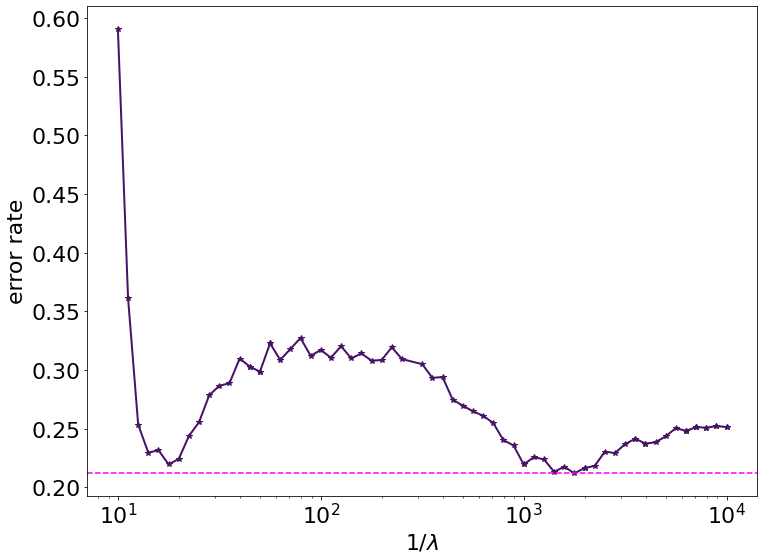

In [69]:
wd_conv = []
for wd in sorted(wd_list)[::-1]:
    wd_conv.append( np.max(np.array(wd_logs[wd]['acc']['test'])[-10:]) )


cmap = matplotlib.cm.get_cmap('viridis')
colorList = [cmap(350/1000), cmap(50/1000)]
    
# plot results
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)  
ax.set_xscale('log')
# ax.set_ylim((-0.02, 0.6))
ax.set_ylabel('error rate')
ax.set_xlabel(r'$1/\lambda$')

ax.plot(1/np.array(sorted(wd_list)[::-1]), 1-np.array(wd_conv)/100, lw = 2, color = colorList[1], marker='*')

ax.axhline(min(1-np.array(wd_conv)/100), color='magenta', ls='dashed')

# ax.legend(loc=2, bbox_to_anchor=(0, 1), fontsize='large',
#           frameon=False, fancybox=True, shadow=True, ncol=1)

plt.show()

# ResNet-18 $l_2$ regularization

In [95]:
out_dir = pathlib.Path.cwd().parent / 'results/resnet/cifar/'

conf_req = None
set_req = ['details']
cur_res = plot_utils.find_experiments_by_config(out_dir, conf_req, set_req, search_text='log', ext='json')

all_l2_files = [i for i, dt in cur_res.items() if 'l2 seq resnet experiments whole size with noise' in dt[0]]

In [96]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])
correct_logs, error_logs = plot_utils.check_train_errors(*[log_list[i] for i in all_l2_files], out_dir = out_dir, interpin=12)

[INFO]: Checking log files for possible errors!
DONE!
Total error found: 1
Range for weight_decay is -1.0...-3.0


In [99]:
verified_wd_runs = sorted([np.log10(cur_log['weight_decay']) for cur_log in correct_logs])

### Plot results

In [102]:
l2_files = [all_l2_files[cur_log['idx']] for cur_log in correct_logs]

In [103]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])

wd_logs = {}
wd_list = []
for wd in l2_files:
    out_file = log_list[wd]
    
    epoch_arr, acc_log = plot_utils.readJsonLog(out_file)
    
    with open(out_file.parent / 'config.json') as fn:
        conf_log = json.load(fn)
    
    wd_list.append(conf_log['weight_decay'])
    wd_logs.update({ conf_log['weight_decay']: { 'epoch' : epoch_arr, 'acc': acc_log} })

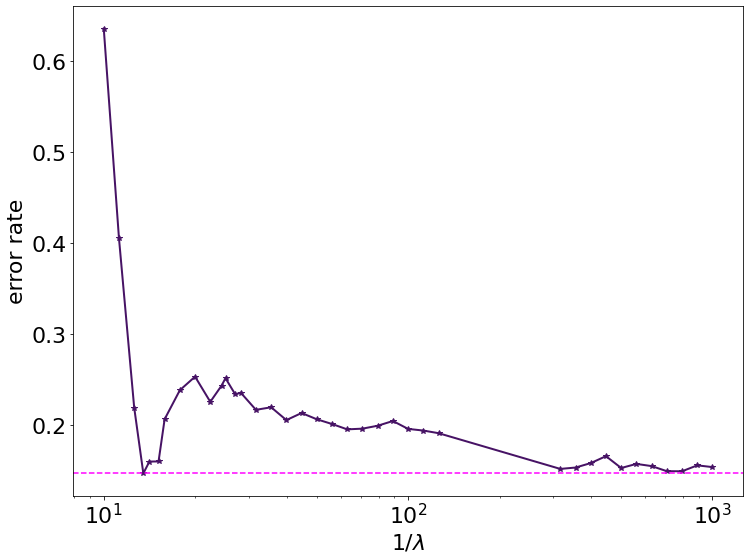

In [104]:
wd_conv = []
for wd in sorted(wd_list)[::-1]:
    wd_conv.append( np.max(np.array(wd_logs[wd]['acc']['test'])[-10:]) )


cmap = matplotlib.cm.get_cmap('viridis')
colorList = [cmap(350/1000), cmap(50/1000)]
    
# plot results
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)  
ax.set_xscale('log')
# ax.set_ylim((-0.02, 0.6))
ax.set_ylabel('error rate')
ax.set_xlabel(r'$1/\lambda$')

ax.plot(1/np.array(sorted(wd_list)[::-1]), 1-np.array(wd_conv)/100, lw = 2, color = colorList[1], marker='*')

ax.axhline(min(1-np.array(wd_conv)/100), color='magenta', ls='dashed')

# ax.legend(loc=2, bbox_to_anchor=(0, 1), fontsize='large',
#           frameon=False, fancybox=True, shadow=True, ncol=1)

plt.show()

# CIFAR-100 $l_2$ regularization

In [87]:
out_dir = pathlib.Path.cwd().parent / 'results/mcnn/cifar100/'

In [89]:
conf_req = None
set_req = ['details']
cur_res = plot_utils.find_experiments_by_config(out_dir, conf_req, set_req, search_text='log', ext='json')

all_l2_files = [i for i, dt in cur_res.items() if 'l2 cifar-100 seq experiments whole size with no noise' in dt[0]]

In [90]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])
correct_logs, error_logs = plot_utils.check_train_errors(*[log_list[i] for i in all_l2_files], out_dir = out_dir, interpin=12)

[INFO]: Checking log files for possible errors!
DONE!
Total error found: 6
Range for weight_decay is -1.5...-3.0


In [93]:
verified_wd_runs = sorted([np.log10(cur_log['weight_decay']) for cur_log in correct_logs])

### Plot results

In [96]:
l2_files = [all_l2_files[cur_log['idx']] for cur_log in correct_logs]

In [97]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])

wd_logs = {}
wd_list = []
for wd in l2_files:
    out_file = log_list[wd]
    
    epoch_arr, acc_log = plot_utils.readJsonLog(out_file)
    
    with open(out_file.parent / 'config.json') as fn:
        conf_log = json.load(fn)
    
    wd_list.append(conf_log['weight_decay'])
    wd_logs.update({ conf_log['weight_decay']: { 'epoch' : epoch_arr, 'acc': acc_log} })

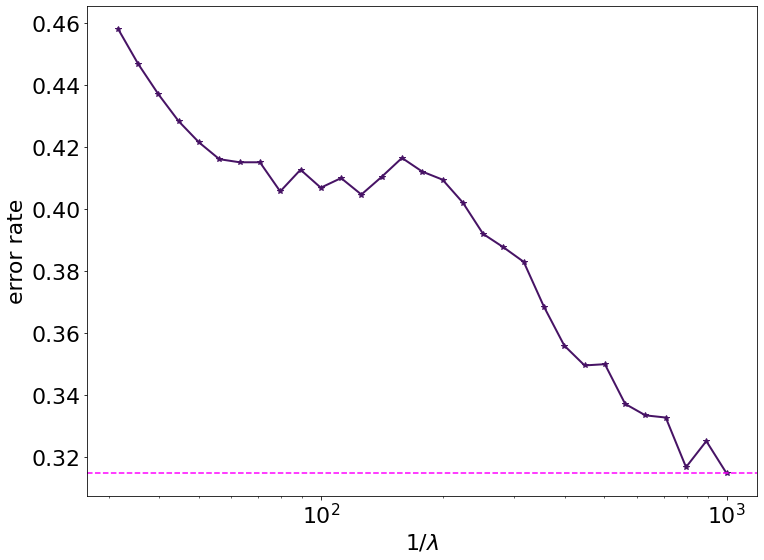

In [98]:
wd_conv = []
for wd in sorted(wd_list)[::-1]:
    wd_conv.append( np.max(np.array(wd_logs[wd]['acc']['test'])[-10:]) )


cmap = matplotlib.cm.get_cmap('viridis')
colorList = [cmap(350/1000), cmap(50/1000)]
    
# plot results
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)  
ax.set_xscale('log')
# ax.set_ylim((-0.02, 0.6))
ax.set_ylabel('error rate')
ax.set_xlabel(r'$1/\lambda$')

ax.plot(1/np.array(sorted(wd_list)[::-1]), 1-np.array(wd_conv)/100, lw = 2, color = colorList[1], marker='*')

ax.axhline(min(1-np.array(wd_conv)/100), color='magenta', ls='dashed')

# ax.legend(loc=2, bbox_to_anchor=(0, 1), fontsize='large',
#           frameon=False, fancybox=True, shadow=True, ncol=1)

plt.show()

# Dropout regularization

In [108]:
conf_req = None
set_req = ['details']
cur_res = plot_utils.find_experiments_by_config(out_dir, conf_req, set_req, search_text='log', ext='json')

all_dp_files = [i for i, dt in cur_res.items() if 'dropout seq experiments whole size with noise' in dt[0]]

In [109]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])
correct_logs, error_logs = plot_utils.check_train_errors(*[log_list[i] for i in all_dp_files], out_dir = out_dir, param='dropout', interpin=12)

[INFO]: Checking log files for possible errors!
DONE!
Total error found: 0
Range for dropout is 0.95...0.05


In [112]:
verified_wd_runs = sorted([cur_log['dropout'] for cur_log in correct_logs])

In [115]:
dp_files = [all_dp_files[cur_log['idx']] for cur_log in correct_logs]

### Plot results

In [116]:
log_list = sorted([fn for fn in out_dir.glob('**/log.json') if len(fn.parent.name.split('-')) == 6])

dp_logs = {}
dp_list = []
for dp in dp_files:
    out_file = log_list[dp]
    
    epoch_arr, acc_log = plot_utils.readJsonLog(out_file)
    
    with open(out_file.parent / 'config.json') as fn:
        conf_log = json.load(fn)
    
    dp_list.append(conf_log['dropout'])
    dp_logs.update({ conf_log['dropout']: { 'epoch' : epoch_arr, 'acc': acc_log} })

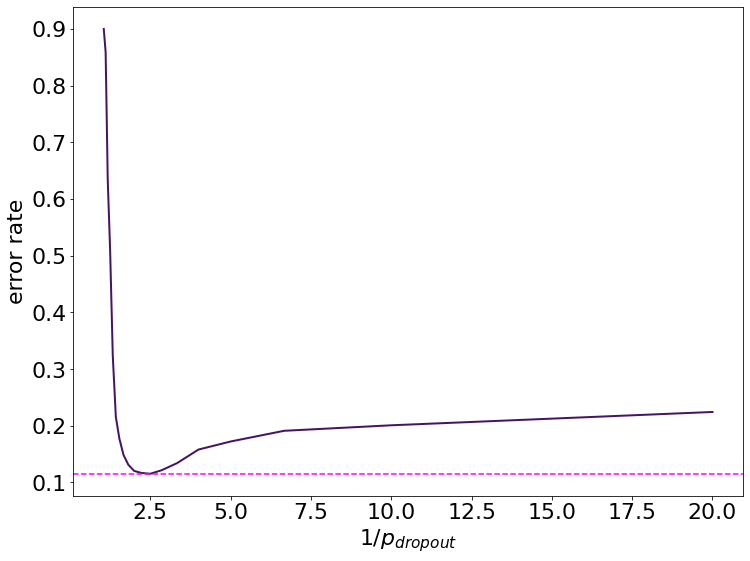

In [117]:
dp_conv = []
for dp in sorted(dp_list)[::-1]:
    dp_conv.append( np.max(np.array(dp_logs[dp]['acc']['test'])[-10:]) )


cmap = matplotlib.cm.get_cmap('viridis')
colorList = [cmap(350/1000), cmap(50/1000)]
    
# plot results
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)  
# ax.set_xscale('log')
# ax.set_ylim((-0.02, 0.6))
ax.set_ylabel('error rate')
ax.set_xlabel(r'$1/p_{dropout}$')

ax.plot(1/np.array(sorted(dp_list)[::-1]), 1-np.array(dp_conv)/100, lw = 2, color = colorList[1])

ax.axhline(min(1-np.array(dp_conv)/100), color='magenta', ls='dashed')

# ax.legend(loc=2, bbox_to_anchor=(0, 1), fontsize='large',
#           frameon=False, fancybox=True, shadow=True, ncol=1)

plt.show()